# Title: WaterMax: breaking the LLM watermark detectability-robustness-quality trade-off

#### Members' Names : Burhan Maseel & Lakshita Mahajan

#### Emails: burhan.maseel@torontomu.ca & lakshita.mahajan@torontomu.ca

# 1. Introduction

#### Problem Description:
Watermarking has become a very critical tool in nullyfying the misuse of Large Language Models (LLMs), as these models can generate text that mimics human writing. There are a huge amount of risks associated, including pretending to be someone else and the generation of fake news. To combat these threats, the ability to trace the origin of generated text is crucial. As LLMs are increasingly used in academic and professional settings, this raises concerns about cheating, plagiarism, and authenticity. For instance, college students might use LLMs to generate essays, reports, or assignments without proper citation, undermining academic integrity. Similarly, in interviews, candidates may use LLMs to generate responses that appear original, leading to unfair advantages and misrepresentations of their actual abilities.

#### Context of the Problem:
Existing watermarking techniques aim to embed imperceptible signals within the text generated by an LLM, allowing the text's origin to be identified later through a secret key. However, many of these methods face a significant trade-off between detectability and text quality. The current literature reveals that while passive methods for text forensics are versatile, they offer low performance with error rates that rarely dip below 10^-3. Active methods like watermarking, though more effective, typically introduce distortions in the text to achieve higher detectability, which compromises the quality of the generated content.

The rise of LLMs has further exacerbated the issue of plagiarism and cheating in education. As these models can generate human-like text on demand, students might exploit them to bypass the effort required for assignments, ultimately degrading the learning process and academic standards. In interviews, candidates might use LLMs to craft responses that appear intelligent and insightful but lack personal experience or understanding. This creates an unfair scenario where the candidate’s true capabilities are hidden, leading to unjust outcomes in hiring decisions.

The ability to detect such misuse through watermarking is essential, but it must be done without compromising the quality of the generated content. As a result, a reliable and robust watermarking technique is needed to address the growing concerns around cheating, plagiarism, and the overall integrity of systems that rely on generated content.


# 2. Methodology

WaterMax introduces a black-box watermarking strategy that ensures robustness and fluency without accessing the internal workings of the language model.

## Watermark Score Function

WaterMax defines a **scoring function** that evaluates how well a generated chunk aligns with a seeded statistical signature. This function enables the system to rank candidate chunks based on how detectable and consistent their watermark signals are.

The watermark score \( S \) for a chunk is calculated as:

\[
S = \sum_{i=1}^{n} \delta\left( \text{chunk}_i \oplus \text{key}_i \right)
\]

Where:
- \( \delta \) returns 1 if the tokens match and 0 otherwise.
- \( n \) is the number of tokens in the chunk.
- \( \text{chunk}_i \) and \( \text{key}_i \) represent the i-th token in the chunk and the watermark key.

## Exploring the Text Space

Instead of modifying token distributions, WaterMax performs **draft-and-select**:

- Multiple candidate chunks are sampled using the base LLM.
- The scoring function evaluates each candidate chunk.
- The chunk with the best score is selected.
- This process repeats chunk by chunk until the full text is generated.

This allows WaterMax to embed watermarks in a **black-box setting** without sacrificing text quality.

## Detection Strategy

Watermark detection is performed using a **likelihood ratio test (LRT)**:

\[
P_{\text{watermark}} = \frac{\text{score of watermark chunk}}{\text{score of random chunk}}
\]

- This test compares the probability of the text being generated with vs. without the watermark under the known seed.
- If the ratio exceeds a threshold, the text is classified as watermarked.

## Robustness to Adversarial Attacks

WaterMax enhances robustness through **chunk-based watermarking**:

- Watermarks are independently embedded in each chunk.
- Local edits (e.g., paraphrasing) only affect some chunks, leaving others intact.
- This design improves resistance against common attacks compared to continuous watermarking.

## Tuning the Trade-off between Fidelity and Detectability

WaterMax introduces a **tuning knob** that balances watermark strength and fluency:

- More drafts = stronger watermark signal, slightly lower fluency.
- Fewer drafts = higher fluency, slightly weaker watermark.

This trade-off allows adapting the watermarking strategy based on application needs.



# 3. Solution

In this section, we outline the solution provided by **WaterMax** for embedding a watermark into text generated by Large Language Models (LLMs). The approach leverages a detector-first design that maximizes detection power while ensuring high-quality, fluent text generation. Below, we explain the key components of the solution.

## 3.1. Watermark Embedding Strategy

**WaterMax** employs a robust watermark embedding strategy that is based on a **chunk-level selection process**. This process enables embedding watermarks without modifying the core architecture or components of the LLM, ensuring the model's functionality remains intact.

### Key Steps in Watermark Embedding:

- **Chunk Generation**: For each segment of the text, multiple candidate chunks are generated using the LLM.
- **Watermark Score Calculation**: Each candidate chunk is evaluated using the **watermark score function**, which calculates the similarity between the chunk and a pre-defined watermark key.
- **Best Chunk Selection**: The chunk with the highest watermark score is selected, ensuring that the watermark is embedded without sacrificing fluency.
- **Iterative Process**: This chunk-based embedding process is repeated for each text segment, ensuring that the watermark is efficiently embedded in the entire text.

This process guarantees that the watermark is seamlessly embedded without requiring internal model modifications, preserving the LLM's original performance and output quality.

## 3.2. Detection Mechanism

Once the watermark is embedded, it can be detected using a **likelihood ratio test (LRT)**. This test allows for the identification of the watermark in the text without requiring access to the internal parameters of the LLM.

### Likelihood Ratio Test for Watermark Detection:

- **Test Functionality**: The LRT compares the likelihood of the text being generated with or without the watermark under the known seeded key.
- **No Need for Model Access**: Unlike traditional methods, **WaterMax** does not require access to the LLM's internals (such as logits or weights).
- **Detection Formula**: The detection is based on the following formula:
  
  \[
  P_{\text{watermark}} = \frac{\text{score of watermark chunk}}{\text{score of random chunk}}
  \]

  If the ratio exceeds a defined threshold, the text is flagged as watermarked.

## 3.3. Robustness and Scalability

**WaterMax** is designed to be robust against various adversarial attacks such as paraphrasing or text manipulation. The use of independent chunks ensures that partial changes in the text do not affect the entire watermark, making it resilient to local edits.

### Advantages of WaterMax's Robustness:

- **Chunk-Based Design**: The watermark is embedded across multiple independent chunks of text, increasing robustness.
- **Local Impact of Edits**: Any changes or edits to individual chunks affect only those specific chunks, preserving the watermark in the rest of the text.
- **Resiliency to Paraphrasing**: The chunk-based design makes it harder for attackers to remove or alter the watermark without significantly degrading the overall text quality.

In addition, **WaterMax** is highly scalable, able to handle large volumes of text generation without significant loss in performance or detection accuracy. The computational complexity remains manageable thanks to modern GPU parallelization techniques.

## 3.4. Key Benefits of the WaterMax Solution

The **WaterMax** watermarking scheme offers several notable benefits that differentiate it from previous approaches:

- **High Detection Accuracy**: Even on short texts, **WaterMax** achieves near-perfect detection accuracy.
- **Minimal Impact on Text Quality**: Unlike previous methods, **WaterMax** ensures that the watermark embedding process does not degrade the fluency or readability of the text.
- **No Model Modification**: **WaterMax** operates as a black-box approach, ensuring that the LLM’s core functionality remains unchanged, allowing for easy integration with pre-existing models.
- **Scalability**: The solution is highly scalable and can be applied to large datasets or real-time text generation scenarios.

**WaterMax** stands out as a robust, efficient, and scalable solution for watermarking text generated by LLMs, offering high detection rates while maintaining text quality.

# 4. Implementation

Setting up Colab Notebook

In [1]:
from google.colab import drive
import sys
import os

drive.mount('/content/drive')

py_file_location = "/content/drive/MyDrive/NLP Projects/WaterMax"
sys.path.append(os.path.abspath(py_file_location))

os.chdir(py_file_location)

Mounted at /content/drive


Installing dependencies

In [23]:
!pip install -r ./src/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 122.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 103.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.2 MB/s eta 0:00:00
   ━

In [2]:
!git lfs install

Hook already exists: pre-push

	#!/bin/sh
	command -v git-lfs >/dev/null 2>&1 || { printf >&2 "\n%s\n\n" "This repository is configured for Git LFS but 'git-lfs' was not found on your path. If you no longer wish to use Git LFS, remove this hook by deleting the 'pre-push' file in the hooks directory (set by 'core.hookspath'; usually '.git/hooks')."; exit 2; }
	git lfs pre-push "$@"

To resolve this, either:
  1: run `git lfs update --manual` for instructions on how to merge hooks.
  2: run `git lfs update --force` to overwrite your hook.


Make sure to configure your SSH key with hugging face before running the clone model code cell. To test whether your ssh key is configured properly run the ssh command. If ssh is configured properly you'll get the message "Hi [username], welcome to Hugging Face."

In [ ]:
!ssh-keygen -t rsa -b 4096 -C "burhan.maseel@torontomu.ca"
!cat /root/.ssh/id_rsa.pub

In [6]:
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts

# github.com:22 SSH-2.0-85aa1254


In [9]:
!ssh -T git@hf.co

Hi anonymous, welcome to Hugging Face.


Once the access to Llama-2 model is approved we have to clone the model locally to generate the watermarked text using the Llama-2-7b-chat-hf model

In [10]:
!git clone git@hf.co:meta-llama/Llama-2-7b-chat-hf src/Llama-2-7b-chat-hf

fatal: destination path 'src/Llama-2-7b-chat-hf' already exists and is not an empty directory.


In [ ]:
from huggingface_hub import notebook_login

notebook_login()

Run the following command to generate the text using the test prompts from a text file from data/test_prompts.txt. Our generated text is stored in results files and the score and p values are stored in the scores files in interactive_prompting directory under the relevant model directory used to generate the text. Here in the followed cells we are printing just the top 3 results from the files but the complete results and scores can be accessed from the results directory.

In [ ]:
!python src/watermax.py --model_name meta-llama/Llama-2-7b-chat-hf --generate --detect --seed=815 --ngram=4 --n=2 --N=2 --prompts data/test_prompts.txt


2025-04-13 03:22:38.589575: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-13 03:22:39.189714: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744514559.421380    5347 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744514559.481704    5347 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-13 03:22:39.999236: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Following function outputs the results and scores from the JSON files generated using the Watermax model

In [37]:
import json

def process_json_file(filepath, max_lines = 3):

    count = 0
    try:
        with open(filepath, 'r') as f:
            for line in f:
                if count >= max_lines:
                    break
                try:
                    data = json.loads(line)
                    print(data)
                    count += 1
                except json.JSONDecodeError as e:
                    print(f"Error decoding JSON: {e}")
                    print(f"Problematic line: {line}")
    except FileNotFoundError:
        print(f"Error: File not found at {filepath}")

In [38]:
filepath = "results/interactive_prompting/Llama-2-7b-chat-hf/results_815_sentence-wm_2_2_256_4_1.0.jsonl"

process_json_file(filepath, max_lines=3)

{'prompt': '[INST] <<SYS>> You are a helpful assistant. Always respond truthfully and to the best of your ability. <</SYS>> Tell me about Deleuze concept of ritournelle\n [/INST]', 'result': '  Gilles Deleuze was a French philosopher known for his complex and abstract ideas. One concept that he wrote about is "ritournelle," which is French for "round trip" or "return journey." In Deleuze\'s philosophy, ritournelle refers to the process of repetition and return, which he believed was fundamental to the creation of new ideas and the transformation of societies.\n\nAccording to Deleuze, ritournelle is a concept that is closely related to his ideas about difference and repetition. In his view, repetition is not simply a matter of repeating something that has already been said or done, but rather it involves the creation of new connections and relationships between different elements. When we repeat something, we are not simply reiterating the same old idea or action, but rather we are crea

In [39]:
filepath = "results/interactive_prompting/Llama-2-7b-chat-hf/scores_815_sentence-wm_2_2_256_4_1.0.jsonl"

process_json_file(filepath, max_lines=3)

{'text_index': 0, 'num_token': 256, 'score': 1.6774163175457097, 'pvalue': 0.1350818995012488, 'all_pvalues': 0.1350818995012488}
{'text_index': 1, 'num_token': 256, 'score': 1.6339906471156715, 'pvalue': 0.08282862079932456, 'all_pvalues': 0.08282862079932456}
{'text_index': 2, 'num_token': 256, 'score': 2.1711781382904274, 'pvalue': 0.04546402425198288, 'all_pvalues': 0.04546402425198288}


Prompts can directly be passed through the command which is demonstrated in these cells along with the output results and their relevant scores

In [ ]:
!python src/watermax.py --model_name meta-llama/Llama-2-7b-chat-hf --generate --detect --seed=926 --ngram=6 --n=2 --N=2 --fp16  --prompts "What was Spinoza's relationship with Leibniz?" "Which philospher spoke about the multicolored cow?"

2025-04-13 03:25:21.267582: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-13 03:25:21.296666: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744514721.323340    6157 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744514721.331630    6157 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-13 03:25:21.362200: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [40]:
filepath = "results/interactive_prompting/Llama-2-7b-chat-hf/results_926_sentence-wm_2_2_256_6_1.0.jsonl"

process_json_file(filepath, max_lines=3)

{'prompt': "[INST] <<SYS>> You are a helpful assistant. Always respond truthfully and to the best of your ability. <</SYS>> What was Spinoza's relationship with Leibniz? [/INST]", 'result': '  Baruch Spinoza and Gottfried Wilhelm Leibniz were two influential philosophers who lived and worked in the 17th century, during the Dutch Golden Age of Philosophy. While they were both contemporary philosophers and shared some common interests and ideas, their relationship was somewhat complex and contentious.\n\nLeibniz, who was born in 1646, was a German philosopher and mathematician who is best known for his work on calculus and his theory of monads. Spinoza, who was born in 1632, was a Dutch philosopher who is best known for his ethical and political philosophy, particularly his theories on substance monism, causality, and the nature of God.\n\nDespite their differences in background and philosophy, Leibniz and Spinoza had some contact and interaction with each other. According to Spinoza\'s 

In [41]:
filepath = "results/interactive_prompting/Llama-2-7b-chat-hf/scores_926_sentence-wm_2_2_256_6_1.0.jsonl"

process_json_file(filepath, max_lines=3)

{'text_index': 0, 'num_token': 256, 'score': 1.3871101265094385, 'pvalue': 0.11607291506583266, 'all_pvalues': 0.11607291506583266}
{'text_index': 1, 'num_token': 134, 'score': -0.8621091576761015, 'pvalue': 0.7200491884683103, 'all_pvalues': 0.7200491884683103}


Using the following command we are generating the benchmarks for Watermax. The test_sentence_wm.py script allows to perform 6 different operations:

- **generate**: Performs the watermarking operation specified by mode with parameters param1 and param2 for prompts defined by benches. Outputs a json file containing the generated texts.
- **detect**: Performs watermark detection using the method specified by mode with parameters param1 and param2 for results of benches. Outputs a json file containing the p-value of each text.
- **rate**: Use the model specified by model_name to rate the resulting texts of benches
- **standardize** (MMW only): Standardize the results and score files to be compatible with the Mark My Words benchmark
- **detect_std** (MMW only): Performs detection on texts generated using Mark My Words, usually used to compute the p-value of texts attacked using the MMW attack suite
- **standardize_final** (MMW only): Same as standardize but expects a file containing the detection results from detect_std.

In [ ]:
!python src/test_sentence_wm.py --mode sentence-wm --model_name meta-llama/Llama-2-7b-chat-hf --generate --detect --seeds 926 --ngram 6 --param1 2 --param2 2 --benches story_reports fake_news invented_stories --beam_chunk_size 6


2025-04-13 03:44:54.211191: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-13 03:44:54.240690: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744515894.267331   11288 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744515894.276412   11288 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-13 03:44:54.306760: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [42]:
filepath = "results/benchmark/Llama-2-7b-chat-hf/results_fake_news_926_sentence-wm_2_2_1024_6_1.0_bcs6.jsonl"

process_json_file(filepath, max_lines=3)

{'prompt': "[INST] <<SYS>> You are a helpful assistant. Always respond with realistic yet invented articles. <</SYS>> Write a news article about Narendra Modi's visit to Barack Obama in a peace conference. [/INST]", 'result': '  Sure, here\'s a fictional news article about Narendra Modi\'s visit to Barack Obama in a peace conference:\n\nTitle: Modi meets Obama in historic peace conference\n\nDate: March 25, 2023\n\nWashington D.C. - In a significant development towards achieving global peace, Indian Prime Minister Narendra Modi met with former US President Barack Obama in a peace conference held in Washington D.C. today. The meeting between the two leaders is being seen as a crucial step towards resolving the ongoing conflicts in the region and promoting international cooperation.\n\nAccording to sources present at the conference, Modi and Obama held extensive talks on various issues, including the ongoing tensions between India and Pakistan, the situation in the Middle East, and the n

In [43]:
filepath = "results/benchmark/Llama-2-7b-chat-hf/scores_fake_news_926_sentence-wm_2_2_1024_6_1.0_bcs6.jsonl"

process_json_file(filepath, max_lines=3)

{'text_index': 0, 'num_token': 786, 'score': -0.8441230237878872, 'pvalue': 0.6404134513385488, 'all_pvalues': 0.6404134513385488}
{'text_index': 1, 'num_token': 690, 'score': 1.091699610486705, 'pvalue': 0.15395221909917, 'all_pvalues': 0.15395221909917}
{'text_index': 2, 'num_token': 650, 'score': 0.36888937903850666, 'pvalue': 0.30649524138098194, 'all_pvalues': 0.30649524138098194}


In [44]:
filepath = "results/benchmark/Llama-2-7b-chat-hf/results_invented_stories_926_sentence-wm_2_2_1024_6_1.0_bcs6.jsonl"

process_json_file(filepath, max_lines=3)

{'prompt': '[INST] <<SYS>> You are a helpful assistant. Always answer in the most accurate way. <</SYS>> Write a story about a man on a quest to find the Holy Grail.. [/INST]', 'result': "  Of course! Here's a story about a man named Sir Timothy on a quest to find the Holy Grail:\n\nSir Timothy was a knight in the kingdom of England, known for his bravery and his unwavering devotion to his lord. But despite his many accomplishments, he felt a sense of restlessness within him, a feeling that there was something more he was meant to do.\n\nOne day, while on a hunting trip in the forest, Sir Timothy stumbled upon an old man who was tending to a small garden. The old man introduced himself as Sir Jasper, a wise and ancient knight who had been on a quest to find the Holy Grail for many years.\n\nSir Jasper told Sir Timothy that the Holy Grail was the cup that Jesus Christ had used during the Last Supper, and that it had the power to heal the sick, bring peace to the troubled, and grant eter

In [45]:
filepath = "results/benchmark/Llama-2-7b-chat-hf/scores_invented_stories_926_sentence-wm_2_2_1024_6_1.0_bcs6.jsonl"

process_json_file(filepath, max_lines=3)

{'text_index': 0, 'num_token': 660, 'score': 4.422342980276202, 'pvalue': 0.009872120174278876, 'all_pvalues': 0.009872120174278876}
{'text_index': 1, 'num_token': 720, 'score': -0.1771479034263669, 'pvalue': 0.4544421034905067, 'all_pvalues': 0.4544421034905067}
{'text_index': 2, 'num_token': 507, 'score': -0.8075130315125375, 'pvalue': 0.7903145151525622, 'all_pvalues': 0.7903145151525622}


In [46]:
filepath = "results/benchmark/Llama-2-7b-chat-hf/results_story_reports_926_sentence-wm_2_2_1024_6_1.0_bcs6.jsonl"

process_json_file(filepath, max_lines=3)

{'prompt': "[INST] <<SYS>> You are a helpful assistant. Always answer in the most accurate way. <</SYS>> Write a book report about 'Pride and Prejudice', written by Jane Austen. [/INST]", 'result': "  Book Title: Pride and Prejudice Author: Jane Austen Published: 1813 Pages: 370 pages Pride and Prejudice, written by Jane Austen in 1813, is a timeless romance novel that has captured the hearts of readers for centuries. The novel follows the lives of the Bennett sisters, particularly Elizabeth and her relationship with the wealthy Mr. Darcy. The story takes place in the late 18th century in England and explores themes of love, class, and societal expectations. Jane Austen's writing style is witty, observant, and engaging, making the novel a delight to read. The main character, Elizabeth Bennett, is a strong and independent woman who challenges the societal norms of her time. Her interactions with Mr. Darcy, a proud and reserved gentleman, are particularly memorable, as their relationship

In [47]:
filepath = "results/benchmark/Llama-2-7b-chat-hf/scores_story_reports_926_sentence-wm_2_2_1024_6_1.0_bcs6.jsonl"

process_json_file(filepath, max_lines=3)

{'text_index': 0, 'num_token': 601, 'score': 0.7883853290989005, 'pvalue': 0.2987977557721523, 'all_pvalues': 0.2987977557721523}
{'text_index': 1, 'num_token': 646, 'score': 2.935663036440582, 'pvalue': 0.01453387609828492, 'all_pvalues': 0.01453387609828492}
{'text_index': 2, 'num_token': 813, 'score': 0.6324205128242744, 'pvalue': 0.24482777644711168, 'all_pvalues': 0.24482777644711168}


In [25]:
!python src/compute_ppl.py --wm sentence-wm --seed 926 --ngram 6 --generator_name Llama-2-7b-chat-hf  --param1 2 --param2 2 --benches fake_news story_reports invented_stories --beam_chunk_size 6

2025-04-13 18:05:34.959048: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-13 18:05:34.975461: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744567534.997740   18112 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744567535.004524   18112 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-13 18:05:35.027234: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [48]:
filepath = "results/benchmark/Llama-2-7b-chat-hf/results_ppl_story_reports_926_sentence-wm_2_2_1024_6_1.0_opt-2.7b_bcs6.jsonl"

process_json_file(filepath, max_lines=3)

{'prompt': "[INST] <<SYS>> You are a helpful assistant. Always answer in the most accurate way. <</SYS>> Write a book report about 'Pride and Prejudice', written by Jane Austen. [/INST]", 'result': "  Book Title: Pride and Prejudice Author: Jane Austen Published: 1813 Pages: 370 pages Pride and Prejudice, written by Jane Austen in 1813, is a timeless romance novel that has captured the hearts of readers for centuries. The novel follows the lives of the Bennett sisters, particularly Elizabeth and her relationship with the wealthy Mr. Darcy. The story takes place in the late 18th century in England and explores themes of love, class, and societal expectations. Jane Austen's writing style is witty, observant, and engaging, making the novel a delight to read. The main character, Elizabeth Bennett, is a strong and independent woman who challenges the societal norms of her time. Her interactions with Mr. Darcy, a proud and reserved gentleman, are particularly memorable, as their relationship

In [49]:
filepath = "results/benchmark/Llama-2-7b-chat-hf/results_ppl_fake_news_926_sentence-wm_2_2_1024_6_1.0_opt-2.7b_bcs6.jsonl"

process_json_file(filepath, max_lines=3)

{'prompt': "[INST] <<SYS>> You are a helpful assistant. Always respond with realistic yet invented articles. <</SYS>> Write a news article about Narendra Modi's visit to Barack Obama in a peace conference. [/INST]", 'result': '  Sure, here\'s a fictional news article about Narendra Modi\'s visit to Barack Obama in a peace conference:\n\nTitle: Modi meets Obama in historic peace conference\n\nDate: March 25, 2023\n\nWashington D.C. - In a significant development towards achieving global peace, Indian Prime Minister Narendra Modi met with former US President Barack Obama in a peace conference held in Washington D.C. today. The meeting between the two leaders is being seen as a crucial step towards resolving the ongoing conflicts in the region and promoting international cooperation.\n\nAccording to sources present at the conference, Modi and Obama held extensive talks on various issues, including the ongoing tensions between India and Pakistan, the situation in the Middle East, and the n

In [50]:
filepath = "results/benchmark/Llama-2-7b-chat-hf/results_ppl_invented_stories_926_sentence-wm_2_2_1024_6_1.0_opt-2.7b_bcs6.jsonl"

process_json_file(filepath, max_lines=3)

{'prompt': '[INST] <<SYS>> You are a helpful assistant. Always answer in the most accurate way. <</SYS>> Write a story about a man on a quest to find the Holy Grail.. [/INST]', 'result': "  Of course! Here's a story about a man named Sir Timothy on a quest to find the Holy Grail:\n\nSir Timothy was a knight in the kingdom of England, known for his bravery and his unwavering devotion to his lord. But despite his many accomplishments, he felt a sense of restlessness within him, a feeling that there was something more he was meant to do.\n\nOne day, while on a hunting trip in the forest, Sir Timothy stumbled upon an old man who was tending to a small garden. The old man introduced himself as Sir Jasper, a wise and ancient knight who had been on a quest to find the Holy Grail for many years.\n\nSir Jasper told Sir Timothy that the Holy Grail was the cup that Jesus Christ had used during the Last Supper, and that it had the power to heal the sick, bring peace to the troubled, and grant eter

In [31]:
!python src/compute_rouge.py --wm sentence-wm --seed 926 --ngram 6 --model_name Llama-2-7b-chat-hf  --param1 2 --param2 2 --benches fake_news story_reports invented_stories --beam_chunk_size 6

2025-04-13 18:15:11.984177: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-13 18:15:12.002486: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744568112.024927   20831 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744568112.031636   20831 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-13 18:15:12.054042: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [16]:
import pickle

def process_pickle_file(filepath):
    try:
        with open(filepath, 'rb') as f:
            data = pickle.load(f)
            formatted_data = {k: float(v) for k, v in data.items()}
            print(formatted_data)
    except FileNotFoundError:
        print(f"Error: File not found at {filepath}")
    except pickle.UnpicklingError as e:
        print(f"Error unpickling file: {e}")


In [20]:
filepath = "results/benchmark/Llama-2-7b-chat-hf/rouge_fake_news_926_sentence-wm_2_2_1024_6_1.0_bcs6.pkl"

process_pickle_file(filepath)

{'rouge1': 1.0, 'rouge2': 1.0, 'rougeL': 1.0, 'rougeLsum': 1.0}


In [21]:
filepath = "results/benchmark/Llama-2-7b-chat-hf/rouge_invented_stories_926_sentence-wm_2_2_1024_6_1.0_bcs6.pkl"

process_pickle_file(filepath)

{'rouge1': 1.0, 'rouge2': 1.0, 'rougeL': 1.0, 'rougeLsum': 1.0}


In [22]:
filepath = "results/benchmark/Llama-2-7b-chat-hf/rouge_story_reports_926_sentence-wm_2_2_1024_6_1.0_bcs6.pkl"

process_pickle_file(filepath)

{'rouge1': 1.0, 'rouge2': 1.0, 'rougeL': 1.0, 'rougeLsum': 1.0}


# 5. Experimental Results

WaterMax demonstrates near-theoretical detectability (close to 1 at P_FA = 10^(-6)) while maintaining minimal text quality loss, showing virtually no perplexity increase even at beam-search \(b=6\). It remains effective across different temperatures by leveraging chunks rather than individual tokens. In contrast, Aaronson’s approach relies on higher temperatures (uncommon in practice) for strong detectability, and KGW, though more detectable at higher \(\delta\), suffers increased perplexity. Under various attacks in the MMW benchmark—where re-translation breaks most methods and “typos” make text unreadable—WaterMax is notably robust for lower temperatures, especially with its “robust detector,” while Aaronson’s scheme becomes more robust at around temperature 1.0 due to its reliance on entropy and broader p-value distribution.

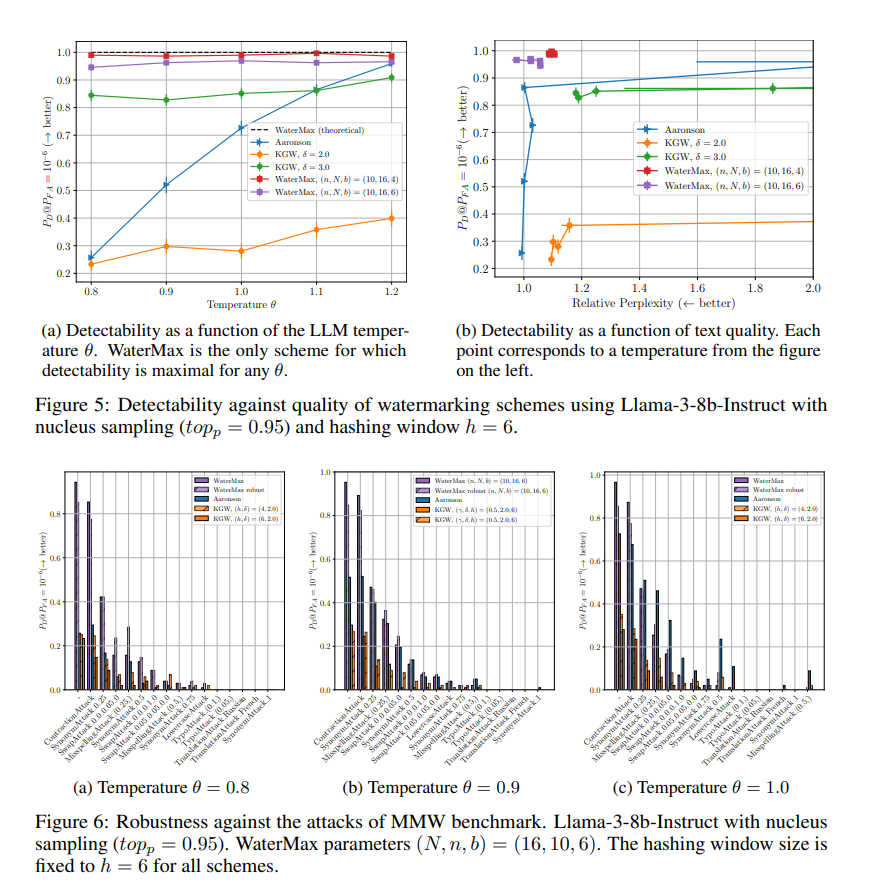

# 6. Conclusion and Future Direction


## 6.1. Conclusion
WaterMax stands out as a new approach to watermarking text generated by large language models (LLMs). Unlike earlier methods, it starts by designing a strong detection system first, and then builds a generation process that makes the watermark easy to spot — without changing anything inside the LLM.
This smart design brings several key benefits:
- High Quality: The generated text still reads naturally and fluently.
- Strong Detection: The watermark is easy to detect, even in short texts.
- Robustness: It holds up well against paraphrasing and small edits.
- No LLM Changes: It works with any LLM (even closed ones like ChatGPT) without needing internal access.


## 6.2. Future Direction
A key direction for future work is the distillation of WaterMax — training or fine-tuning a language model to natively generate watermarked text. This would eliminate the current computational overhead of generating multiple drafts and make the watermarking process faster and more efficient.
If successful, this approach could allow real-time, low-cost watermarking while keeping all the benefits of WaterMax — high fluency, strong detection, and compatibility with any LLM.


## 6.3. Lessons Learned
- Learned how to clone and set up a GitHub project locally.
- Understood the overall structure and logic of the WaterMax codebase.
- Gained hands-on experience in running the project and interpreting the output.
- Developed a deeper understanding of how watermarking works in LLMs through practical exploration.
- Realized the importance of detector-first design and chunk-level sampling in watermark robustness.


# 7. References:
[1]: Giboulot, E., & Furon, T. (2024, December 11). WaterMax: Breaking the LLM watermark detectability-robustness-quality trade-off. Advances in Neural Information Processing Systems, 37 (NeurIPS 2024) Main Conference Track, https://openreview.net/forum?id=HjeKHxK2VH.
